### 업무 수행자: 최정윤

In [1]:
import os
import sys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
name1 = 'tests'

In [7]:
base_path = os.path.abspath('../..')
data_path = os.path.join(base_path, 'data')

# 1. Read Data

Read data from two source & process them for comdty returns

In [8]:
cindex_path = os.path.join(data_path, 'fut1return-com.csv')
cindex1_path = os.path.join(data_path, 'BCOM.csv')

In [9]:
cindex = pd.read_csv(cindex_path, header=0, index_col=0, parse_dates=True)
cindex1 = pd.read_csv(cindex1_path, header=0, index_col=0, parse_dates=True)

In [10]:
cindex.head()

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
1991-12-31,713.08,39.98,328.528,109.21,3600.5000,324.9375,8.764,9.25,12.41,26.35,74.94,8209.6875,994.56,282.44
1992-01-01,713.08,39.98,328.528,109.21,3600.5000,324.9375,8.764,9.25,12.41,26.35,74.94,8209.6875,994.56,282.44
1992-01-02,709.06,40.75,319.232,107.13,3586.1875,320.9375,8.905,8.83,12.69,26.03,74.47,8128.5625,1011.20,284.40
1992-01-03,705.65,40.21,317.764,107.53,3561.1250,321.4375,8.898,8.63,12.65,25.90,74.59,8103.1875,1015.04,285.59
1992-01-06,703.24,40.17,312.627,107.53,3575.4375,326.1250,8.887,8.72,12.63,26.25,74.86,8082.9375,1004.80,286.88


In [11]:
cindex1.head()

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
1991-12-31,86.3694,86.4741,65.6628,88.8292,95.6038,89.1786,87.6810,110.5430,99.6313,97.1475,82.0302,134.5759,74.5280,89.8971
1992-01-01,86.3694,86.4741,65.6628,88.8292,95.6038,89.1786,87.6810,110.5430,99.6313,97.1475,82.0302,134.5759,74.5280,89.8971
1992-01-02,85.8831,88.1475,65.7664,87.1446,95.2236,88.0979,89.0931,105.5072,101.7477,95.9655,81.5061,133.2459,75.7750,90.5200
1992-01-03,85.4697,86.9264,65.9218,87.4633,94.5584,88.2180,89.0258,103.1735,101.3352,95.4590,81.6371,132.8303,76.0627,90.8998
1992-01-06,85.1780,86.8359,65.2486,87.4633,94.9385,89.4988,88.9137,104.2789,100.8509,96.7535,81.9429,132.4978,75.2954,91.3100


CRet is a variable that indicates percentage change between period

In [12]:
CRet = cindex.pct_change(periods=1).iloc[1:]
CRet1 = cindex1.pct_change(periods=1).iloc[1:]
Cindex = (1. + CRet).cumprod()

In [13]:
Cindex.head()

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
1992-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1992-01-02,0.994362,1.019260,0.971704,0.980954,0.996025,0.987690,1.016089,0.954595,1.022562,0.987856,0.993728,0.990118,1.016731,1.006940
1992-01-03,0.989580,1.005753,0.967236,0.984617,0.989064,0.989229,1.015290,0.932973,1.019339,0.982922,0.995330,0.987028,1.020592,1.011153
1992-01-06,0.986201,1.004752,0.951599,0.984617,0.993039,1.003655,1.014035,0.942703,1.017728,0.996205,0.998932,0.984561,1.010296,1.015720
1992-01-07,0.986762,0.977489,0.970961,0.975369,0.994029,1.001731,1.007645,0.928649,0.979049,0.994307,1.004804,0.978996,1.026384,1.021314


In [14]:
RETFinal = CRet

# 2. Parameter Setting

<strong>Commodity Price Momentum 전략</strong>

- Long term Momentum과 Short term 모멘텀을 1:1 배율로 조합
- Long term Momentum 및 Short term 모멘텀에 대한 설명은 다음과 같음
    - Long term Momentum
        - 기준: 52주
        - CS: 상대 모멘텀 * (1/3) + 절대 모멘텀 * (1/3)
        - TS: 상대 모멘텀 * (1/3) + 절대 모멘텀 * (1/3)
    - Short term Momentum
        - 기준: 52주(52 - 35 = 17주를 의도한 것 같지만, 실제로는 52주를 사용)
        - CS: 상대 모멘텀(1/3)
        - TS: 상대 모멘텀(1/3)    
- 의심되는 점
    - Short Term Momentum
        - 52주 적용을 의도한 것인지 확인 필요

In [15]:
### parameter setting
RBP = 3
CSNUM = 0.35
CSpos = 0

In [16]:
TSWGT = 1
CSWGT = 1
RB1 = RBP
RB2 = RBP
RET = CRet
index = Cindex
CSdesign = "vol"

# 3. Caculate Signal

In [17]:
# weather sensitive comdty group
w_group = ["C","S","SB","SM","W","KC","CT"]
n_w_group = [x for x in Cindex.columns if x not in w_group]
c_groups = [w_group, n_w_group]

In [18]:
for i in range(2):
    if i == 0:
        RET = CRet[w_group]
    if i == 1:
        RET = CRet[n_w_group]

    index = Cindex[RET.columns]

    # 1. read data
    fx = pd.read_csv(os.path.join(data_path, 'fx.csv')) # businnes day
    index = index[index.index.to_series().dt.dayofweek == 1]

    # 2. define parameter
    minobs1 = 52
    longlen = 52  # lookback period for calculating momentum
    shortlen = 0
    CS = CSNUM

    # 3. longterm signal
    Ret = RET

    ### Magnitude
    index_52_week_after = index.iloc[longlen-shortlen:]
    index_52_week_before = index.iloc[:index_52_week_after.shape[0]]
    Mag = pd.DataFrame(index_52_week_after.to_numpy() / index_52_week_before.to_numpy(), columns=index.columns)
    Mag = Mag - 1
    Mag.index = index_52_week_after.index

    RV = Mag

    ### Reliability
    ret = pd.DataFrame(index.iloc[1:].to_numpy() / index.iloc[:-1].to_numpy(), columns=index.columns) - 1
    ret.index = index.index[1:]
    STDEV = ret.rolling(window=longlen, min_periods=1).std().fillna(0).iloc[longlen-1:] * np.sqrt(52)
    STDEV.index = index.iloc[longlen:].index
    STDEV1 = STDEV.loc[Mag.index]
    RV = Mag 

    # Cross Sectional 1
    RV1 = RV.iloc[minobs1-1:,]
    truecount = (RV1.notnull().sum(axis=1) * CS).apply(round) # number of asset to consider

    CSRV = RV1.rank(axis=1, method='first')
    CSRV1 = (RV1 * -1).rank(axis=1, method='first')

    CSRVpos = CSRV * 0
    CSRVpos[CSRV.apply(lambda x: x <= truecount, axis=0)] = -1
    CSRVpos[CSRV1.apply(lambda x: x <= truecount, axis=0)] = 1
    CSRelpos=CSRVpos

    # TS1 
    TSRel = RV.iloc[minobs1-1:]
    TS1 = TSRel * 0
    TS1[TSRel > 0.] = 1.
    TS1[TSRel < 0.] = -1.

    # Cross Sectional 2
    up = ret.applymap(lambda x: 1 if x >= 0 else 0)
    Conroll = up.rolling(longlen - shortlen, min_periods=1).sum().iloc[minobs1-1:,] / (longlen - shortlen)
    RV = Conroll.iloc[:Conroll.shape[0] - shortlen, :]

    RV1 = RV.iloc[minobs1-1:,]
    truecount = (RV1.notnull().sum(axis=1) * CS).apply(round) # number of asset to consider

    CSRV = RV1.rank(axis=1, method='first')
    CSRV1 = (RV1 * -1).rank(axis=1, method='first')

    CSRVpos = CSRV * 0
    CSRVpos[CSRV.apply(lambda x: x <= truecount, axis=0)] = -1
    CSRVpos[CSRV1.apply(lambda x: x <= truecount, axis=0)] = 1
    CSConpos = CSRVpos

    # TS2
    TSRel = RV.iloc[minobs1-1:,:]
    TS2 = TSRel * 0
    TS2[TSRel > 0.5] = 1
    TS2[TSRel < 0.5] = -1

    # final position
    TSRVL =TS1 * 1/3 + TS2 * 1/3 # 52 week return * 1/3 + 52 up weeks ratio * 1/3
    CSRVL= CSRelpos * 1/3 + CSConpos * 1/3

    # 4. Short Term Signal
    longlen = 52
    shortlen = 35

    # Magnitude
    Ret = RET

    ### Magnitude
    Mag = index.iloc[longlen:, :]
    obs = Mag.shape[0]
    Mag = pd.DataFrame(
        index.iloc[longlen - shortlen:longlen-shortlen+obs,:].to_numpy() /\
        index.iloc[:obs].to_numpy(),
        columns=index.columns) - 1
    Mag.index = index.iloc[longlen:,:].index
    RV = Mag

    ### Reliability

    ret = pd.DataFrame(index.iloc[1:].to_numpy() / index.iloc[:-1].to_numpy(), columns=index.columns) - 1
    ret.index = index.index[1:]
    STDEV = ret.rolling(window=longlen, min_periods=1).std().fillna(0).iloc[longlen-1:] * np.sqrt(52)
    STDEV.index = index.iloc[longlen:].index
    STDEV1 = STDEV.loc[Mag.index]

    RV = Mag 

    # Cross Sectional 1
    RV1 = RV.iloc[minobs1-1:,]
    truecount = (RV1.notnull().sum(axis=1) * CS).apply(round) # number of asset to consider

    CSRV = RV1.rank(axis=1, method='first')
    CSRV1 = (RV1 * -1).rank(axis=1, method='first')

    CSRVpos = CSRV * 0
    CSRVpos[CSRV.apply(lambda x: x <= truecount, axis=0)] = -1
    CSRVpos[CSRV1.apply(lambda x: x <= truecount, axis=0)] = 1
    CSRelpos=CSRVpos

    # Cross Sectional 1
    RV1 = RV.iloc[minobs1-1:,]
    truecount = (RV1.notnull().sum(axis=1) * CS).apply(round) # number of asset to consider

    CSRV = RV1.rank(axis=1, method='first')
    CSRV1 = (RV1 * -1).rank(axis=1, method='first')

    CSRVpos = CSRV * 0
    CSRVpos[CSRV.apply(lambda x: x <= truecount, axis=0)] = -1
    CSRVpos[CSRV1.apply(lambda x: x <= truecount, axis=0)] = 1
    CSRelpos=CSRVpos

    # TS1 
    TSRel = RV.iloc[minobs1-1:]
    TS1 = TSRel * 0
    TS1[TSRel > 0.] = 1.
    TS1[TSRel < 0.] = -1.

    # Cross Sectional 2
    up = ret.applymap(lambda x: 1 if x >= 0 else 0)
    Conroll = up.rolling(longlen - shortlen, min_periods=1).sum().iloc[minobs1-1:,] / (longlen - shortlen)
    RV = Conroll.iloc[:Conroll.shape[0] - shortlen, :]

    RV1 = RV.iloc[minobs1-1:,]
    truecount = (RV1.notnull().sum(axis=1) * CS).apply(round) # number of asset to consider

    CSRV = RV1.rank(axis=1, method='first')
    CSRV1 = (RV1 * -1).rank(axis=1, method='first')

    CSRVpos = CSRV * 0
    CSRVpos[CSRV.apply(lambda x: x <= truecount, axis=0)] = -1
    CSRVpos[CSRV1.apply(lambda x: x <= truecount, axis=0)] = 1
    CSConpos = CSRVpos

    # TS2
    TSRel = RV.iloc[minobs1-1:,:]
    TS2 = TSRel * 0
    TS2[TSRel > 0.5] = 1
    TS2[TSRel < 0.5] = -1

    # final position
    TSRVSh = TS1 * 1/3 # + TS2*WGT[2]
    CSRVSh = CSRelpos * 1/3 # + CSConpos*WGT2[2]

    # 5. Long Momentum + Short Momentum Combination
    TSRV=TSRVSh.loc[TSRVL.index, :]*1 + TSRVL*1
    CSRV=CSRVSh.loc[CSRVL.index, :]*1 + CSRVL*1

    if i == 0:
        TSRVrun1 = TSRV
        CSRVrun1 = CSRV
    if i == 1:
        TSRVrun2 = TSRV
        CSRVrun2 = CSRV

# 4. Combine Result

In [19]:
TSRV = pd.concat([TSRVrun1, TSRVrun2], axis=1)
CSRV = pd.concat([CSRVrun1, CSRVrun2], axis=1)

In [20]:
TSRV = TSRV[CRet.columns]
CSRV = CSRV[CRet.columns]

In [21]:
CSRV.head()

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
1993-12-28,0.333333,-0.666667,0.666667,-0.333333,-0.333333,0.333333,0.666667,0.333333,-1.000000,0.000000,0.333333,1.000000,-1.000000,-0.333333
1994-01-04,0.333333,-0.666667,0.666667,-0.333333,0.000000,0.666667,0.666667,0.333333,-0.666667,-0.333333,0.000000,0.666667,-1.000000,-0.333333
1994-01-11,0.333333,-0.666667,0.666667,-0.333333,0.000000,0.666667,0.666667,0.333333,-0.666667,-0.333333,0.000000,0.666667,-1.000000,-0.333333
1994-01-18,0.333333,-0.666667,0.666667,-0.333333,0.333333,0.666667,0.666667,0.000000,-0.666667,-0.333333,0.000000,0.333333,-1.000000,0.000000
1994-01-25,0.333333,-0.666667,0.666667,-0.333333,0.000000,0.666667,0.666667,0.000000,-1.000000,-0.333333,0.333333,0.333333,-0.666667,0.000000


In [22]:
CSRV.tail()

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
2018-04-10,0.000000,0.666667,-1.000000,0.666667,-0.333333,0.666667,-1.000000,-1.0,0.333333,0.333333,0.333333,-0.333333,-0.333333,1.000000
2018-04-17,-0.333333,0.333333,-0.666667,0.666667,0.333333,0.666667,-0.666667,-1.0,0.333333,0.333333,0.333333,-0.333333,-0.666667,0.666667
2018-04-24,-0.333333,0.333333,-0.666667,0.333333,0.333333,0.333333,-0.666667,-1.0,0.666667,0.000000,0.333333,0.000000,0.000000,0.333333
2018-05-01,0.000000,0.333333,-0.666667,0.333333,0.333333,0.333333,-0.333333,-1.0,1.000000,0.333333,-0.666667,-0.666667,-0.333333,1.000000
2018-05-08,0.000000,0.333333,-1.000000,0.333333,0.333333,0.333333,-0.333333,-1.0,1.000000,0.000000,-0.333333,0.000000,-0.666667,1.000000


In [23]:
# Align dates with Return DataFrame
TSRV = TSRV.loc[RET.index].fillna(method='ffill').dropna(how='all')
CSRV = CSRV.loc[RET.index].fillna(method='ffill').dropna(how='all')

# Align dates with each other
if TSRV.index[0] > CSRV.index[0]:
    CSRV = CSRV.loc[TSRV.index[0]:]
else:
    TSRV = TSRV.loc[CSRV.index[0]:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


# 5. Backtest

In [21]:
def ex_ante_vol(df_ret, todate, weights, lookback=130, shrink_corr=0.9):
    '''
    Args:
        df_ret: pandas DataFrame of returns
        todate: date to calculate ex ante vol
        weights: weight of strategy before ex ante vol control
        lookback: number of days to consider for calculating cov
        shrink_corr: weight to shrink correlation
    '''
    # setting data range
    todate_loc = df_ret.index.get_loc(todate)
    if todate_loc > lookback:
        fromdate_loc = todate_loc - lookback
    else:
        fromdate_loc = 0
    
    # calculate corr apply shrinkage
    corr = df_ret.iloc[fromdate_loc:todate_loc].corr()
    corr = corr * shrink_corr + np.diag(np.ones(len(df_ret.columns))) * (1.- shrink_corr)
    # calculate cov
    std = df_ret.iloc[fromdate_loc:todate_loc].std()
    cov = pd.DataFrame(np.diag(std).dot(corr).dot(np.diag(std)), index=RET.columns, columns=RET.columns)
    # calculate ex ante vol
    return np.sqrt(weights.dot(cov).dot(weights)) * np.sqrt(260)

In [36]:
class GRP_bt:
    '''
    '''
    def __init__(self, CSLS, RET, RB, min_vol, freq):
        '''
        '''
        self.CSLS = CSLS  # Cross Sectional Exposure Type. 'vol' means volatility allocation. 'notional' means notional. 
        self.RET = RET  # 
        self.RB = RB
        
        self.Assetvol = 0.02 # vol control parameter for individual assets
        self.Strategyvol = 0.02 # vol control parameter for whole strategy
        self.factorvol = 0.02
        self.factorsd = 260 # lookback period for calcualting factorvol
        self.assetsd = 90 # lookback period for calculating Assetvol
        self.statsd = 90 # lookback period for calcualting Strategyvol

        self.volband = 0.05 # if controled vol is within volband, do not change vol
        self.min_vol = min_vol # vol floor 0.04 for ir strategy, 0.15 for all otheres
        self.freq = freq # strategy frequency setting. it only applys to Cross Sectional backtesting now.
        
        # Calculating volatility for assets
        std = (self.RET.rolling(window=self.assetsd).std() * np.sqrt(260)).iloc[self.assetsd:]
        # Adjust calculated asset volatility
        self.std_adj = self.adjust_by_volband(std, self.volband, min_vol=self.min_vol)

    def adjust_by_volband(self, df_vol, volband, min_vol=None):
        for i in range(1, len(df_vol.index)):
            count = 0
            
            if df_vol.iloc[i].name.weekday() == self.RB:
                for c in range(len(df_vol.columns)):
                    # case1. if new std is null
                    if pd.isnull(df_vol.iloc[i, c]):
                        df_vol.iloc[i, c] = df_vol.iloc[i-1, c]
                    # case2. if new std within volband
                    if abs(df_vol.iloc[i, c] - df_vol.iloc[i-1, c]) < volband * df_vol.iloc[i-1, c] :
                        df_vol.iloc[i, c] = df_vol.iloc[i-1, c]
            else:
                df_vol.iloc[i] = df_vol.iloc[i-1]
        if min_vol is not None:
            df_vol[df_vol < min_vol] = min_vol

        return df_vol
    
    def ts_vol_control_backtest(self, TSRV):
        # Time Series 
        VCweight = self.Assetvol / self.std_adj
        VCTSpos = (VCweight * TSRV).loc[TSRV.index[0]:] # Vol Control Time Series Position
        VCTSpos.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Strategy level vol control
        # return of VC strategy
        Strategy = ((self.RET * VCTSpos.shift(1)).sum(axis=1)).loc[TSRV.index[0]:]
        # using average of expanding & moving window strategy risk
        Strategyrisk_expanding = (Strategy.expanding(min_periods=self.statsd).std()*np.sqrt(260)).iloc[self.statsd:]
        Strategyrisk_rolling = (Strategy.rolling(window=self.statsd).std()*np.sqrt(260)).iloc[self.statsd:]
        Strategyrisk = (Strategyrisk_expanding + Strategyrisk_rolling) / 2.
        # volband adjustment
        bufrisk = self.adjust_by_volband(Strategyrisk.copy().to_frame(), self.volband)
        # apply strategy level vol control to position
        statlev = self.Strategyvol / bufrisk.iloc[:,0]
        self.TSposition = VCTSpos.multiply(statlev, axis='index').iloc[self.statsd:]
        self.TSposition.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.TSposition.fillna(0, inplace=True)
        
        # calculate daily strategy return
        self.TSStrategy = (self.RET * self.TSposition.shift(1)).sum(axis=1).loc[TSRV.index[0]:]
        self.TSStrategylag = (self.RET * self.TSposition.shift(2)).sum(axis=1).loc[TSRV.index[0]:]
    
    def cs_vol_control_backtest(self, CSRV):
        if self.CSLS == 'vol':
            CSRV = (CSRV * self.Assetvol / self.std_adj).loc[CSRV.index[0]:]
        #elif self.CSLS != 'notional': # raise error
            
        # Calculating Ex-ante Vol and adjust to target vol which specified by 'Strategyvol'
        if self.freq == 'week':
            for i in range(len(CSRV.index)):
                if CSRV.iloc[i].name.weekday() == self.RB:
                    CSRV.iloc[i] = CSRV.iloc[i] * self.Strategyvol / ex_ante_vol(self.RET, CSRV.iloc[i].name, CSRV.iloc[i])
                else:
                    CSRV.iloc[i] = CSRV.iloc[i-1]
        elif self.freq == 'month':
                for i in range(len(CSRV.index)):
                    if CSRV.iloc[i].name.month != CSRV.iloc[i-1].name.month:
                        CSRV.iloc[i] = CSRV.iloc[i] * self.Strategyvol / ex_ante_vol(self.RET, CSRV.iloc[i].name, CSRV.iloc[i])
                    else:
                        CSRV.iloc[i] = CSRV.iloc[i-1]
        #else: # raise error
            
        # Strategy level vol control
        # return of VC strategy
        CSraw = (self.RET * CSRV.shift(1)).dropna(how='all').sum(axis=1)
        CSrisk = (CSraw.rolling(window=self.statsd).std()*np.sqrt(260)).iloc[self.statsd:]
        
        # volband adjustment
        cs_bufrisk = self.adjust_by_volband(CSrisk.to_frame(), self.volband)
        # apply strategy level vol control to position
        cs_statlev = self.Strategyvol / cs_bufrisk.iloc[:,0]
        self.CSposition = CSRV.multiply(cs_statlev, axis='index').iloc[self.statsd:]
        self.CSposition.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.CSposition.fillna(0, inplace=True)
        
        # calculate daily strategy return
        self.CSStrategy = (self.RET * self.CSposition.shift(1)).sum(axis=1).loc[CSRV.index[0]:]
        self.CSStrategylag = (self.RET * self.CSposition.shift(2)).sum(axis=1).loc[CSRV.index[0]:]

### TS

In [37]:
RET = RETFinal

In [38]:
RET.head()

,GC,CL,NG,HG,C,S,SI,SB,XBW,SM,BO,W,KC,CT
1992-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1992-01-02,-0.005638,0.019260,-0.028296,-0.019046,-0.003975,-0.012310,0.016089,-0.045405,0.022562,-0.012144,-0.006272,-0.009882,0.016731,0.006940
1992-01-03,-0.004809,-0.013252,-0.004599,0.003734,-0.006989,0.001558,-0.000786,-0.022650,-0.003152,-0.004994,0.001611,-0.003122,0.003797,0.004184
1992-01-06,-0.003415,-0.000995,-0.016166,0.000000,0.004019,0.014583,-0.001236,0.010429,-0.001581,0.013514,0.003620,-0.002499,-0.010088,0.004517
1992-01-07,0.000569,-0.027135,0.020347,-0.009393,0.000996,-0.001916,-0.006301,-0.014908,-0.038005,-0.001905,0.005878,-0.005652,0.015924,0.005508


In [39]:
GRP_bt_test = GRP_bt(CSLS='vol', RET=RET, RB=RBP, min_vol=0.15, freq='week')
#GRP_bt_test.ts_vol_control_backtest(TSRV)

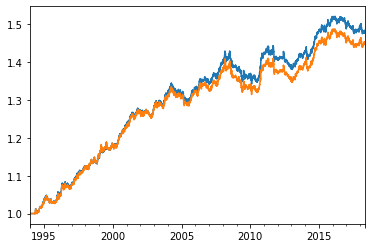

In [26]:
(1. + GRP_bt_test.TSStrategy).cumprod().plot()
(1. + GRP_bt_test.TSStrategylag).cumprod().plot()

### CS

In [27]:
GRP_bt_test.cs_vol_control_backtest(CSRV)

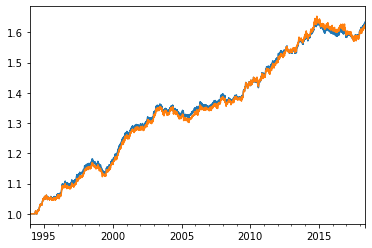

In [28]:
(1. + GRP_bt_test.CSStrategy).cumprod().plot()
(1. + GRP_bt_test.CSStrategylag).cumprod().plot()